In [1]:
# initial parameters

%matplotlib inline
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [2]:
your_local_path = 'D:/Prashant/LEARNING/UPX/ML/Project/Customer Segmentation _ Recommendation/'

# Data Wrangling

In [3]:
cust_df = pd.read_csv(your_local_path+'Supermarket Purchase.csv')

In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id                         702 non-null int64
AVG_Actual_price_12             702 non-null float64
Purchase_Value                  702 non-null float64
No_of_Items                     702 non-null int64
Total_Discount                  702 non-null float64
MONTH_SINCE_LAST_TRANSACTION    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


In [5]:
cust_df.rename(columns={'AVG_Actual_price_12':'MRP'},inplace=True)

In [6]:
cust_df.head()

,Cust_id,MRP,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


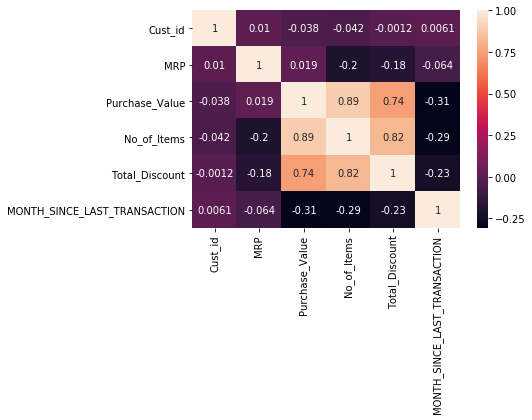

In [7]:
#finding correlation factor
sns.heatmap(cust_df.corr(),annot=True)

In [8]:
cust_df_filtered = cust_df[['MRP','No_of_Items','Total_Discount','MONTH_SINCE_LAST_TRANSACTION']]

# Standerdize/scale the data

In [9]:
cust_df_scld = pd.DataFrame(preprocessing.scale(cust_df_filtered),columns=cust_df_filtered.columns)

In [10]:
cust_df_scld.head()

,MRP,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,-1.247672,-0.335637,-0.356357,1.676849
1,-0.042388,0.263643,0.992207,-0.851028
2,0.461776,-0.435517,-0.342998,-0.289277
3,1.004965,-0.385577,-0.330495,-1.131903
4,-0.114390,0.213703,-0.057571,0.272473


# KMeans Clustering

In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [12]:
inertiadist = []
meandist=[]
k = range(1,20)

for num_of_cluster in k:
    model = KMeans(num_of_cluster)
    model.fit(cust_df_scld)
    inertiadist.append(model.inertia_/100)
    meandist.append(sum(np.min(cdist(cust_df_scld, model.cluster_centers_, 'euclidean'),axis=1)))
    
cluster_vs_inertia = pd.DataFrame({'ClusterNo':k,'Error':inertiadist})

In [13]:
cluster_vs_inertia.head()

,ClusterNo,Error
0,1,28.080000
1,2,19.095162
2,3,13.577704
3,4,9.398423
4,5,7.501468


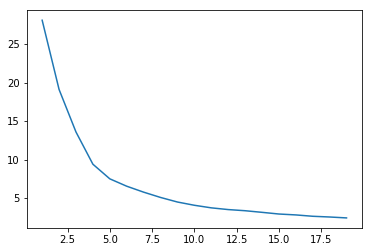

In [14]:
plt.plot(cluster_vs_inertia.ClusterNo,cluster_vs_inertia.Error)

In [15]:
#Elbow at hence 4 Clusters

In [16]:
clusters = KMeans(4)
clusters.fit(cust_df_scld)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
cust_df['Cluster'] = clusters.labels_

In [18]:
cust_df[cust_df['Cluster']==1].head()

,Cust_id,MRP,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,Cluster
16,26,1276.385086,206681.90,172,291783.10,1,1
32,48,1669.538462,185976.00,104,524174.00,1,1
67,93,2163.279221,286244.50,154,163280.50,1,1
83,117,657.465636,36160.61,55,236339.39,4,1
267,372,1026.325821,170390.16,149,211364.84,1,1


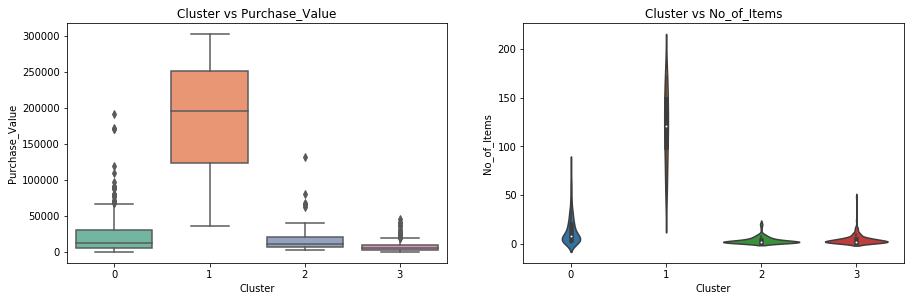

In [19]:
plt.figure(0,figsize=(15,15))

plt.subplot(321)
sns.boxplot(x="Cluster", y="Purchase_Value",  data=cust_df, palette="Set2")
plt.title('Cluster vs Purchase_Value')

plt.subplot(322)
sns.violinplot(x='Cluster', y='No_of_Items', data=cust_df)
plt.title('Cluster vs No_of_Items')

plt.show()

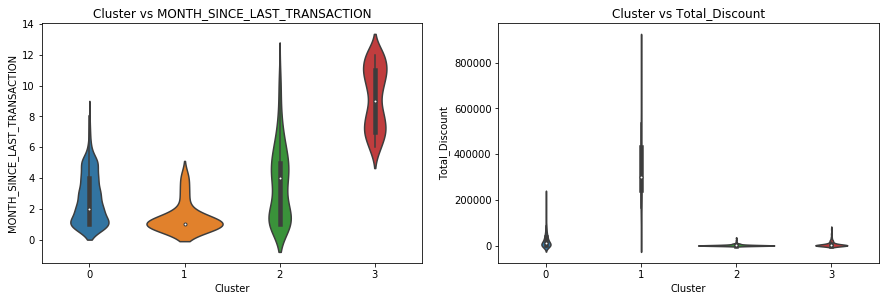

In [20]:
plt.figure(0,figsize=(15,15))

plt.subplot(321)
sns.violinplot(x='Cluster', y='MONTH_SINCE_LAST_TRANSACTION', data=cust_df)
plt.title('Cluster vs MONTH_SINCE_LAST_TRANSACTION')

plt.subplot(322)
sns.violinplot(x='Cluster', y='Total_Discount', data=cust_df)
plt.title('Cluster vs Total_Discount')

plt.show()

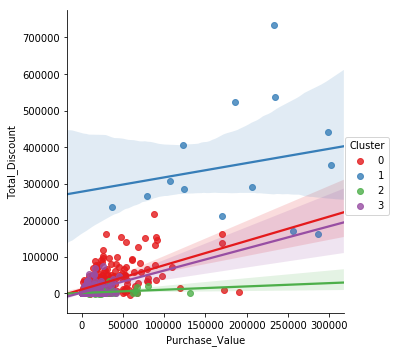

In [21]:
mx = sns.lmplot(x="Purchase_Value", y="Total_Discount", data=cust_df, hue="Cluster",palette='Set1')

# Conclusion

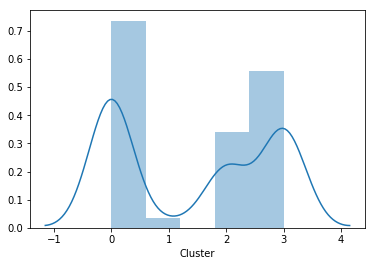

In [22]:
sns.distplot(cust_df['Cluster'])

In [26]:
def transform_cluster(cluster):
    if(cluster == 2):
        cluster = 'PotentialRegularCustomer'
    elif(cluster == 3):
        cluster = 'Discountinued'
    elif (cluster == 1):
        cluster = 'RegularDiscountCustomer'
    else:
        cluster = 'LoyalCustomer'
    return cluster
        
    

In [27]:
cust_df['Customer_Class']=cust_df['Cluster'].transform(transform_cluster)

In [28]:
cust_df.head()

,Cust_id,MRP,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,Cluster,Customer_Class
0,1,300.000000,1200.00,4,0.00,11,3,Discountinued
1,2,2563.282500,41012.52,16,78737.48,2,0,LoyalCustomer
2,4,3510.000000,7020.00,2,780.00,4,2,PotentialRegularCustomer
3,8,4530.000000,13590.00,3,1510.00,1,2,PotentialRegularCustomer
4,9,2428.076923,33455.00,15,17445.00,6,0,LoyalCustomer
